<a href="https://colab.research.google.com/github/ShovalBenjer/deep_learning_neural_networks/blob/main/Deep_exc_1_adir_shoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TL;DR**

We implemented a logistic neural network to solve the XOR classification problem.
The network supports hidden layers with 𝑘 neurons and an optional bypass connection for direct input to output.
Models were tested with k=1,2,4, using Binary Cross-Entropy Loss for training.
We designed a custom activation function (BTU) with adjustable sharpness to enhance flexibility.
The network achieved perfect predictions for the XOR truth table across all configurations.
Results showed that increasing 𝑘 improves learning efficiency and reduces loss, with smooth convergence observed.

Writers: Adir Amar 209017755, Shoval Benjer 319037404

# **Setup and imports**

In [4]:
import torch
from torch import nn
import seaborn as sns
import matplotlib.pyplot as plt

class BTU(nn.Module):
    """
    A custom activation function based on the logistic sigmoid function with adjustable sharpness (T).

    Parameters:
    - T (float): Controls the sharpness of the activation. Smaller values make the function sharper.

    Methods:
    - forward(input: torch.Tensor): Applies the activation to the input tensor.
    """
    def __init__(self, T=0.5):
        super(BTU, self).__init__()
        self.T = T

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Applies the BTU activation function to the input tensor.

        Args:
        - input (torch.Tensor): The input tensor to apply the activation on.

        Returns:
        - torch.Tensor: Activated output tensor.
        """
        return 1 / (1 + torch.exp(-input / self.T))


class LogisticNeuralNetwork(nn.Module):
    """
    A logistic neural network with a customizable hidden layer size and optional bypass connection.

    Parameters:
    - k (int): Number of neurons in the hidden layer.
    - bypass (bool): Whether to include a bypass connection from the input to the output.

    Methods:
    - forward(x: torch.Tensor): Performs forward propagation.
    - train_model(x: torch.Tensor, y: torch.Tensor, epochs: int, learning_rate: float): Trains the model using backpropagation.
    """
    def __init__(self, k, bypass=False):
        super(LogisticNeuralNetwork, self).__init__()
        self.k = k
        self.bypass = bypass
        self.hidden = nn.Linear(2, k)  # Hidden layer: input size = 2, output size = k
        self.output = nn.Linear(k + (2 if bypass else 0), 1)  # Output layer
        self.activation = BTU()

    def forward(self, x):
        """
        Forward pass of the logistic neural network.

        Args:
        - x (torch.Tensor): Input tensor (batch_size x 2).

        Returns:
        - torch.Tensor: Output tensor (batch_size x 1).
        """
        h = self.activation(self.hidden(x))  # Hidden layer activation
        if self.bypass:
            h = torch.cat((h, x), dim=1)  # Concatenate input if bypass is enabled
        return self.activation(self.output(h))

    def train_model(self, x, y, epochs=1000, learning_rate=0.01):
        """
        Trains the model using Mean Squared Error loss and Adam optimizer.

        Args:
        - x (torch.Tensor): Input tensor (batch_size x 2).
        - y (torch.Tensor): Target tensor (batch_size x 1).
        - epochs (int): Number of training epochs.
        - learning_rate (float): Learning rate for the optimizer.

        Returns:
        - list: Training loss at each epoch.
        """
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss
        losses = []

        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.forward(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

        return losses

def plot_loss_curves_seaborn(losses_by_k):
    """
    Plots the loss curves for different configurations of k using Seaborn.

    Args:
    - losses_by_k (dict): Dictionary mapping k to their respective loss lists.

    Returns:
    - None (plots the loss curves).
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    for k, losses in losses_by_k.items():
        sns.lineplot(x=range(1, len(losses) + 1), y=losses, label=f'k = {k}')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves for Different Hidden Layer Configurations')
    plt.legend()
    plt.show()


## **K=1,2,4 According to Task, Training and Visualization :**

Training model with k=1, bypass=True...
Epoch 100/1000, Loss: 0.6910
Epoch 200/1000, Loss: 0.6316
Epoch 300/1000, Loss: 0.3630
Epoch 400/1000, Loss: 0.2064
Epoch 500/1000, Loss: 0.1341
Epoch 600/1000, Loss: 0.0954
Epoch 700/1000, Loss: 0.0720
Epoch 800/1000, Loss: 0.0566
Epoch 900/1000, Loss: 0.0459
Epoch 1000/1000, Loss: 0.0380

Truth table:
Input: [0.0, 0.0], Predicted Output: 0, Expected Output: 0
Input: [0.0, 1.0], Predicted Output: 1, Expected Output: 1
Input: [1.0, 0.0], Predicted Output: 1, Expected Output: 1
Input: [1.0, 1.0], Predicted Output: 0, Expected Output: 0
Training model with k=2, bypass=False...
Epoch 100/1000, Loss: 0.6367
Epoch 200/1000, Loss: 0.4730
Epoch 300/1000, Loss: 0.2513
Epoch 400/1000, Loss: 0.1030
Epoch 500/1000, Loss: 0.0572
Epoch 600/1000, Loss: 0.0376
Epoch 700/1000, Loss: 0.0271
Epoch 800/1000, Loss: 0.0207
Epoch 900/1000, Loss: 0.0164
Epoch 1000/1000, Loss: 0.0134

Truth table:
Input: [0.0, 0.0], Predicted Output: 0, Expected Output: 0
Input: [0.0, 1

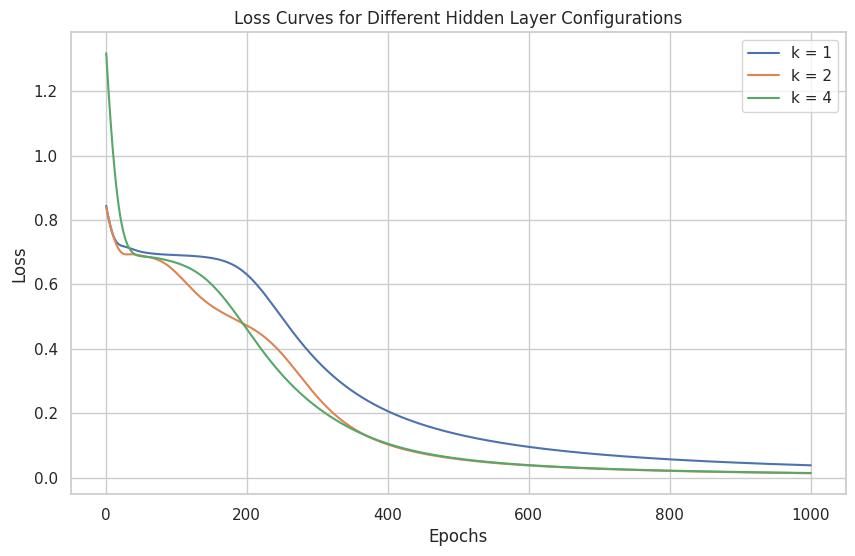

In [5]:
# Dataset: XOR problem
x = torch.FloatTensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = torch.FloatTensor([[0.], [1.], [1.], [0.]])

# Collect losses for visualization
losses_by_k = {}
for k in [1, 2, 4]:
    bypass = k == 1  # Enable bypass for k=1
    model = LogisticNeuralNetwork(k, bypass)
    print(f"Training model with k={k}, bypass={bypass}...")
    losses = model.train_model(x, y, epochs=1000, learning_rate=0.01)
    losses_by_k[k] = losses

    # Evaluate the model
    print("\nTruth table:")
    y_pred = model(x)
    for i in range(4):
        predicted = round(y_pred[i].item())
        print(f"Input: {x[i].tolist()}, Predicted Output: {predicted}, Expected Output: {int(y[i].item())}")

# Plot the loss curves using Seaborn
plot_loss_curves_seaborn(losses_by_k)


# **Key Takeaways**
**Bypass Connection Effectiveness**

for k=1, the bypass connection allows the network to learn the XOR function, compensating for the limited capacity of the hidden layer.

**Capacity vs. Efficiency**

Increasing the number of neurons (𝑘) improves the network's ability to model complex relationships and reduces loss more efficiently, but it increases computational complexity.

**Binary Cross-Entropy Loss**

Using BCELoss ensures accurate training for binary classification tasks like XOR, with convergence observed across all configurations.

**Smooth Convergence**

Loss values decrease steadily across epochs, with no signs of instability or overfitting, indicating appropriate architecture and learning parameters.
Model Performance

All configurations (k=1,2,4) achieve perfect predictions for the XOR truth table, demonstrating the model's flexibility and robustness.

**Scalability**

With k=4, the model is overparameterized for XOR but demonstrates readiness for scaling to more complex tasks.


In [6]:
def plot_loss_curves(losses_by_k, k_values):
    """
    Plots the loss curves for different configurations of k.

    Args:
    - losses_by_k (dict): Dictionary mapping k to their respective loss lists.
    - k_values (list): List of k values used during training.

    Returns:
    - None (plots the loss curves).
    """
    plt.figure(figsize=(10, 6))
    for k, losses in losses_by_k.items():
        plt.plot(range(1, len(losses) + 1), losses, label=f'k = {k}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Curves for Different Hidden Layer Configurations')
    plt.legend()
    plt.grid(True)
    plt.show()

losses_by_k = {}
for k in [1, 2, 4]:
    bypass = k == 1
    model = LogisticNeuralNetwork(k, bypass)
